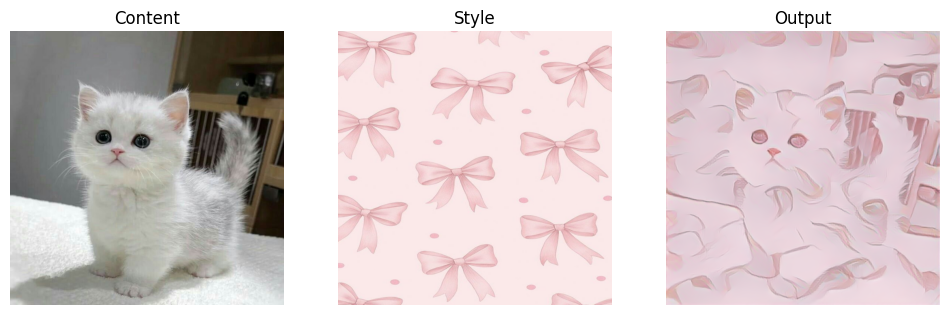

Hasil disimpan sebagai hasil_style_transfer.png


In [6]:
# --- Natural Style Transfer ---
# By: Siti Maesaroh (NIM: 41236798, TI-2023-KIP-P4)

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(path, image_size=(512, 512)):
    img = Image.open(path).convert('RGB')
    img = img.resize(image_size)
    img = np.array(img) / 255.0
    img = img.astype('float32')   # FIX dtype
    img = img[np.newaxis, ...]
    return img

# --- Upload gambar utama dan gambar style ---
content_path = "/content/download (1).jpg"   # foto sendiri
style_path   = "/content/download (3).jpg"   # foto berdua

content_image = load_image(content_path)
style_image = load_image(style_path)

# Load model TF Hub
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# --- FIX pemanggilan model ---
stylized_image = model(
    tf.constant(content_image, dtype=tf.float32),
    tf.constant(style_image, dtype=tf.float32)
)[0]

# Tampilkan hasil
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(content_image[0]); plt.title("Content"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(style_image[0]); plt.title("Style"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(stylized_image[0]); plt.title("Output"); plt.axis("off")
plt.show()

# Simpan
Image.fromarray((stylized_image[0].numpy()*255).astype('uint8')).save("hasil_style_transfer.png")
print("Hasil disimpan sebagai hasil_style_transfer.png")